In [10]:
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import PolynomialFeatures

#New! for Legendre
from scipy.special import legendre
from sklearn.metrics import r2_score #for r-squared


import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import rc

from tqdm import tqdm

# Set default font to 'Times New Roman'
rc('font', family='Times New Roman')

## Data Pre Processing and Visualization

### Load Data

In [11]:
path = '/Users/Farid/Downloads/woolsey-selected/'

sensor_interest_1 = pd.read_csv('./Data/sensor_interest_1 737433.txt')
print('sensor_interest_1: ', sensor_interest_1.shape)

sensor_interest_2 = pd.read_csv('./Data/sensor_interest_2 764848.txt')
print('sensor_interest_2: ', sensor_interest_2.shape)

sensor_interest_3 = pd.read_csv('./Data/sensor_interest_3 764632.txt')
print('sensor_interest_3: ', sensor_interest_3.shape)

sensor_interest_1:  (9216, 38)
sensor_interest_2:  (9216, 38)
sensor_interest_3:  (9216, 38)


### Visualize the Data

In [12]:
from datetime import datetime, timedelta

# Define the starting date
start_date = datetime(2018, 10, 1)  # start from 1st October 2023

# Define the number of days
n_days = 3

# Create the list of days
days = [(start_date + timedelta(days=i)).strftime('%m/%d') for i in range(n_days)]
print('days: ', days)


days:  ['10/01', '10/02', '10/03']


/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_99916/4105916518.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_99916/4105916518.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_99916/4105916518.py:25: SettingWithCopyWarning: 
A value is

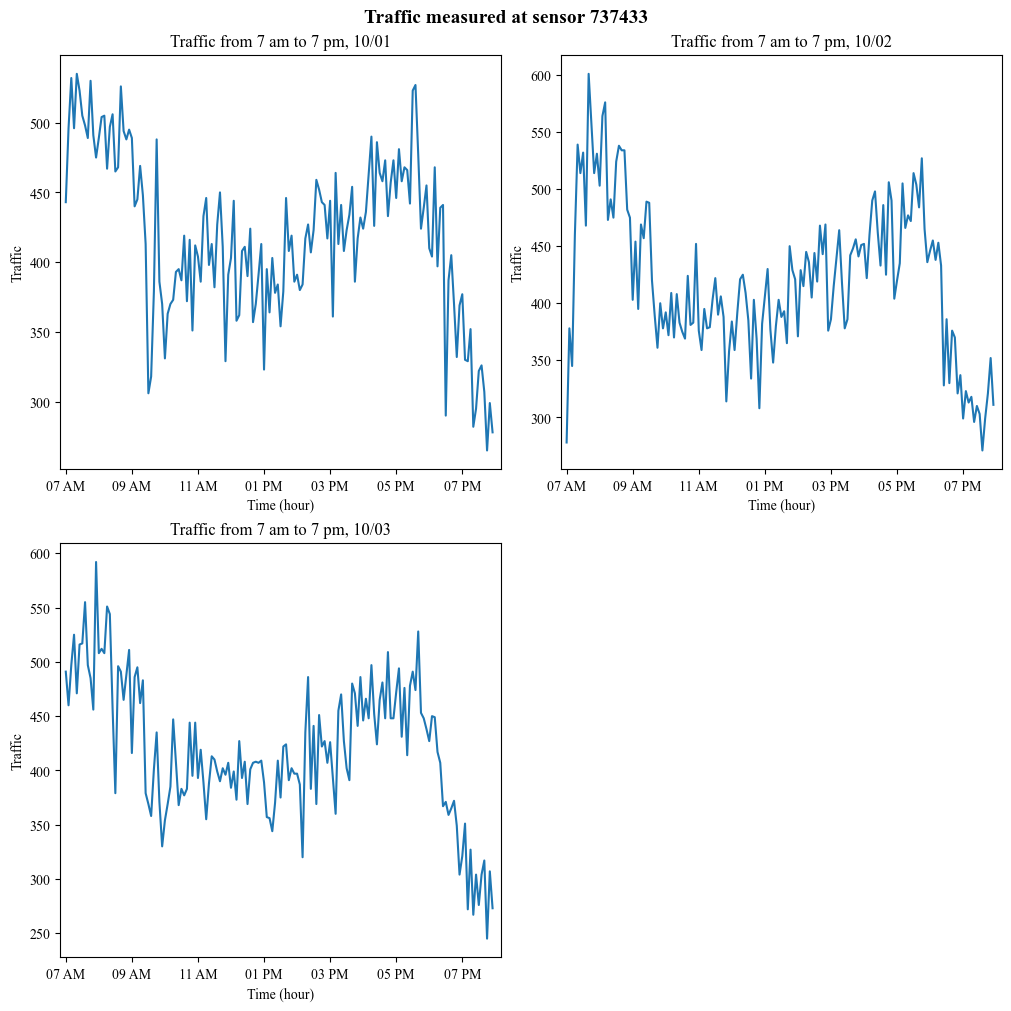

/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_99916/4105916518.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_99916/4105916518.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_99916/4105916518.py:72: SettingWithCopyWarning: 
A value is

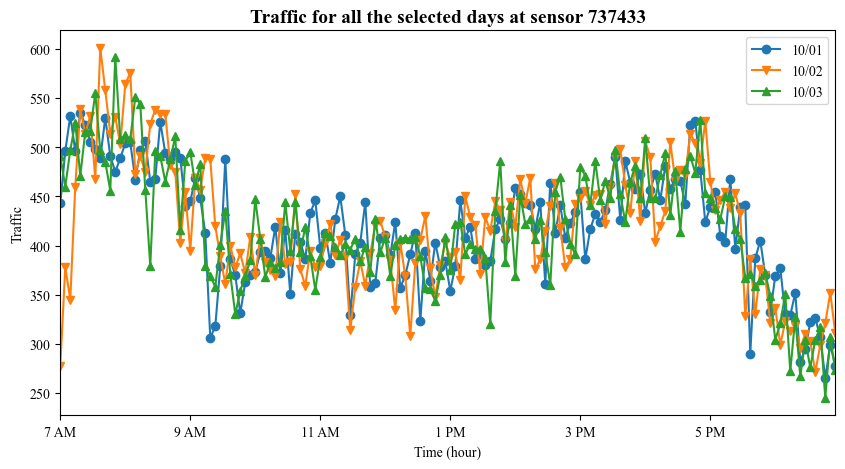

In [13]:

################################################################################################
sensor_interest = sensor_interest_1
sensor_id = 737433
################################################################################################


#####   Subplots
#####


# Calculate number of rows required for subplots
n = len(days)
nrows = n // 2 if n % 2 == 0 else n // 2 + 1

# Initialize figure and axes for subplots
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(10, nrows*5), constrained_layout=True)
axs = axs.flatten()  # flatten array to make indexing easier

fig.suptitle(f'Traffic measured at sensor {sensor_id}', fontsize=14, weight='bold')

for i, day in enumerate(days):
    ax = axs[i]  # current subplot

    time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]
    time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

    # Filter out data outside of 7 AM to 7 PM
    time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

    # y values
    traffic = time_series_data['10']

    # x values - use 'Time' values
    time = time_series_data['Time']

    # Create scatter plot
    ax.plot(time, traffic)

    # Set x-axis format and locator
    hours = mdates.DateFormatter('%I %p')
    hour_locator = mdates.HourLocator(interval=2)  # put a tick on every 2 hours
    ax.xaxis.set_major_locator(hour_locator)
    ax.xaxis.set_major_formatter(hours)

    # Adjust x limits to start slightly before 7 AM and end at 7 PM
    start_time = time.min().replace(hour=6, minute=50, second=0)  # 10 minutes before 7 AM
    end_time = time.max().replace(hour=20, minute=10, second=0)
    ax.set_xlim(start_time, end_time)

    # Set axis titles
    ax.set_xlabel('Time (hour)')
    ax.set_ylabel('Traffic')
    ax.set_title('Traffic from 7 am to 7 pm, '+day)

# If there are more subplots than days (i.e. an even number of subplots), remove the extra one
if len(days) % 2 != 0:
    fig.delaxes(axs[-1])  

plt.show()

#####   Additional 1-plot
#####


# Define a list of markers
markers = ['o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', '.', ',']

fig, ax = plt.subplots(figsize=(10, 5))

for i, day in enumerate(days):
    time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]
    time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

    # Filter out data outside of 7 AM to 7 PM
    time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

    # y values
    traffic = time_series_data['10']

    # Plot the data for all series with different markers for each day
    if n_days < 10:
        ax.plot(np.arange(len(traffic)), traffic, label=day, marker=markers[i%len(markers)])
    else:
        ax.plot(np.arange(len(traffic)), traffic, label=day)  # Use modulus to prevent out of index errors

# Set x-axis ticks and labels
x_ticks = np.linspace(0, len(traffic), 7)  # generate 7 evenly spaced x-axis locations
time_labels = ['7 AM', '9 AM', '11 AM', '1 PM', '3 PM', '5 PM', '7 PM']  # corresponding time labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(time_labels)

# Adjust x limits to start slightly before 7 AM and end at 7 PM
start_time = np.arange(len(traffic)).min()  # 10 minutes before 7 AM
end_time = np.arange(len(traffic)).max()  # 10 minutes after 7 PM
ax.set_xlim(start_time, end_time)

# Set labels and title for the combined plot
ax.set_xlabel('Time (hour)')
ax.set_ylabel('Traffic')
ax.set_title(f'Traffic for all the selected days at sensor {sensor_id}', fontsize=14, weight='bold')
ax.legend()

plt.show()

/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_99916/1469223246.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])


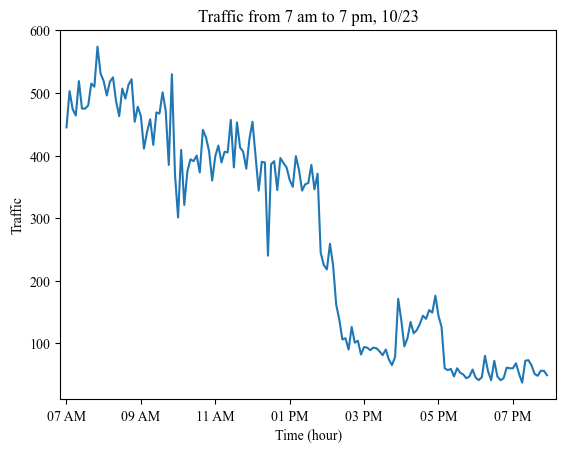

In [14]:
day = "10/23"
################################################################################################


time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]

# Ensure 'Time' column is in datetime format
time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

# Filter out data outside of 7 AM to 7 PM
time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

# y values
traffic = time_series_data['10']

# x values - use 'Time' values
time = time_series_data['Time']

fig, ax = plt.subplots()

# Create scatter plot
ax.plot(time, traffic)

# Set x-axis format and locator
hours = mdates.DateFormatter('%I %p')
hour_locator = mdates.HourLocator(interval=2)  # put a tick on every 2 hours
ax.xaxis.set_major_locator(hour_locator)
ax.xaxis.set_major_formatter(hours)

# Adjust x limits to start slightly before 7 AM and end at 7 PM
start_time = time.min().replace(hour=6, minute=50, second=0)  # 10 minutes before 7 AM
end_time = time.max().replace(hour=20, minute=10, second=0)
ax.set_xlim(start_time, end_time)

# Set axis titles
ax.set_xlabel('Time (hour)')
ax.set_ylabel('Traffic')
ax.set_title('Traffic from 7 am to 7 pm, '+day)

plt.show()


# Traffic Prediction

## Functions

In [15]:
def generate_multi_legendre_design_matrix_(x_initial, polynomial_order):
    if np.isscalar(x_initial):
        x_initial = np.array([[x_initial]])

    # Ensure x_initial is a 2D numpy array
    x_initial = np.atleast_2d(x_initial)
    

    # N is the number of observations,      num_vars is the number of input variables
    N, n_input_vars = x_initial.shape

    # Number of terms in the expansion for each variable (x1^0, x1^1, x1^2, ...)
    n_expansion_terms = polynomial_order + 1

    # Total number of terms in the expansion
    total_expansion_terms = n_expansion_terms ** n_input_vars

    # Initialize design matrix
    design_matrix = np.empty((N, total_expansion_terms), dtype='float64')

    # Loop over each data point
    for i in range(N):
        col_index = 0 # just a counter
        # Loop over all combinations of polynomial orders for each variable
        for terms in np.ndindex(*([n_expansion_terms]*n_input_vars)): ######## CHECK
            product = 1.0
            # Calculate the product of Legendre polynomials for this combination of terms
            for var in range(n_input_vars):
                P_j = legendre(terms[var])
                product *= P_j(x_initial[i, var])
            # Store result in the design matrix
            design_matrix[i, col_index] = product
            col_index += 1
            

    return design_matrix

In [16]:
####                                                                               ####
####                                                                               ####
#### This one goes up until the parameters that do not exceed the polynomial order ####
####                                                                               ####
####                                                                               ####

import numpy as np
from numpy.polynomial.legendre import Legendre
from sklearn.preprocessing import MinMaxScaler

def generate_multi_legendre_design_matrix(x_initial, polynomial_order):
    x_initial = np.atleast_2d(x_initial)
    n_input_vars = x_initial.shape[1]
    
    # Generate multi-index for which the sum of the indices is <= polynomial_order
    indices = np.indices((polynomial_order + 1,) * n_input_vars).reshape(n_input_vars, -1)
    indices = indices[:, np.sum(indices, axis=0) <= polynomial_order]
    
    # Initialize design matrix
    design_matrix = np.empty((x_initial.shape[0], indices.shape[1]), dtype='float64')


    # Compute product of variables raised to the power of indices
    for row in range(x_initial.shape[0]):
        for col, idx in enumerate(indices.T):
            product = 1
            for var, power in enumerate(idx):
                if power != 0:
                    P_j = Legendre.basis(deg=power)
                    product *= P_j(x_initial[row, var])
                else:
                    product *= 1
            design_matrix[row, col] = product
            
    return design_matrix

In [17]:
xx = np.array([[1,2],[1,2],[1,2]])
print('xx: ', xx)

print('generate_multi_legendre_design_matrix_:\n', generate_multi_legendre_design_matrix_(xx,2))
print('\ngenerate_multi_legendre_design_matrix:\n', generate_multi_legendre_design_matrix(xx,2))

print('\ngenerate_multi_legendre_design_matrix_: ', generate_multi_legendre_design_matrix_(xx,2).shape)
print('\ngenerate_multi_legendre_design_matrix: ', generate_multi_legendre_design_matrix(xx,2).shape)


xx:  [[1 2]
 [1 2]
 [1 2]]
generate_multi_legendre_design_matrix_:
 [[1.  2.  5.5 1.  2.  5.5 1.  2.  5.5]
 [1.  2.  5.5 1.  2.  5.5 1.  2.  5.5]
 [1.  2.  5.5 1.  2.  5.5 1.  2.  5.5]]

generate_multi_legendre_design_matrix:
 [[1.  2.  5.5 1.  2.  1. ]
 [1.  2.  5.5 1.  2.  1. ]
 [1.  2.  5.5 1.  2.  1. ]]

generate_multi_legendre_design_matrix_:  (3, 9)

generate_multi_legendre_design_matrix:  (3, 6)


### Predictive Algorithm

In [18]:
def online_kaczmarz_legendre_multiple(x_initial, target_values, polynomial_order, weights=None):

    # Initialize MinMaxScaler to normalize to range [-1,1]
    #scaler = MinMaxScaler(feature_range=(-1, 1))
    # x_initial = ( x_initial - x_initial.min() ) / ( x_initial.max() - x_initial.min() )

    design_matrix = generate_multi_legendre_design_matrix(x_initial, polynomial_order)

    if weights is None:
        # initialize the weights to be the number of columns in the design matrix
        weight_predictions = np.random.rand(design_matrix.shape[1])
    else:
        weight_predictions = weights

    beta_parameter = 0

    for i in range (design_matrix.shape[0]):
        a = design_matrix[i, :]
        #a = ( a_0 - a_0.min() ) / ( a_0.max() - a_0.min() )
        
        weight_predictions = weight_predictions + ((target_values[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T

        
        ################
        # weight_predictions =  (weight_predictions + a.min() ) * ( a.max() - a.min() )
        ################


        # This is for beta
        # Note: you may want to uncomment this if you want to compute beta_parameter
        # residual_errors = target_values - design_matrix @ weight_predictions
        # sse = residual_errors.T @ residual_errors
        # beta_parameter = sse / ( - polynomial_order)

    return weight_predictions, beta_parameter

## 1. Sensor 737433 (traffic increase after fire)

### Load the data of the sensor of interest, and the m closest sensors.

In [19]:
## m=4

sensor_1_ = pd.read_csv('./Data/sensor_interest_1 737433.txt')
print('sensor_1: ', sensor_1_.shape)


sensor_1_m_1_ = pd.read_csv('./Data/sensor_1_m_8 772564.txt')
sensor_1_m_2_ = pd.read_csv('./Data/sensor_1_m_9 775975.txt')
sensor_1_m_3_ = pd.read_csv('./Data/sensor_1_m_11 775961.txt')
sensor_1_m_4_ = pd.read_csv('./Data/sensor_1_m_14 775949.txt')

sensor_1:  (9216, 38)


### Filter out the measurements that are outside the time intervals of interest.
We want to see the measurements from   **_7 am to 7 pm_**

In [20]:
# Ensure 'Time' column is in datetime format
sensor_1_['Time'] = pd.to_datetime(sensor_1_['Time'])
sensor_1_m_1_['Time'] = pd.to_datetime(sensor_1_m_1_['Time'])
sensor_1_m_2_['Time'] = pd.to_datetime(sensor_1_m_2_['Time'])
sensor_1_m_3_['Time'] = pd.to_datetime(sensor_1_m_3_['Time'])
sensor_1_m_4_['Time'] = pd.to_datetime(sensor_1_m_4_['Time'])

# Filter out data outside of 7 AM to 7 PM
sensor_1 = sensor_1_[(sensor_1_['Time'].dt.hour >= 7) & (sensor_1_['Time'].dt.hour < 19)]
sensor_1_m_1 = sensor_1_m_1_[(sensor_1_m_1_['Time'].dt.hour >= 7) & (sensor_1_m_1_['Time'].dt.hour < 19)]
sensor_1_m_2 = sensor_1_m_2_[(sensor_1_m_2_['Time'].dt.hour >= 7) & (sensor_1_m_2_['Time'].dt.hour < 19)]
sensor_1_m_3 = sensor_1_m_3_[(sensor_1_m_3_['Time'].dt.hour >= 7) & (sensor_1_m_3_['Time'].dt.hour < 19)]
sensor_1_m_4 = sensor_1_m_4_[(sensor_1_m_4_['Time'].dt.hour >= 7) & (sensor_1_m_4_['Time'].dt.hour < 19)]

# Reset the indices
sensor_1 = sensor_1.reset_index(drop=True)
sensor_1_m_1 = sensor_1_m_1.reset_index(drop=True)
sensor_1_m_2 = sensor_1_m_2.reset_index(drop=True)
sensor_1_m_3 = sensor_1_m_3.reset_index(drop=True)
sensor_1_m_4 = sensor_1_m_4.reset_index(drop=True)


print('sensor_1: ', sensor_1.shape)
print('sensor_1_m_1: ', sensor_1_m_1.shape)
print('sensor_1_m_2: ', sensor_1_m_2.shape)
print('sensor_1_m_3: ', sensor_1_m_3.shape)
print('sensor_1_m_4: ', sensor_1_m_4.shape)

sensor_1:  (4608, 38)
sensor_1_m_1:  (4607, 38)
sensor_1_m_2:  (4608, 38)
sensor_1_m_3:  (4608, 34)
sensor_1_m_4:  (4608, 34)


### Generate the matrix as per the specifications in the paper.
Each row will have the measurements of traffic from the sensor of interest and the m-closest sensors.
- The rows will include traffic information of the t-1, t-2,..., t-r observations.
- The rows are organized by sensor, and by timestep: 
<br><br>[sensor of interest @ t-1,...,sensor of interest @ t-r, ... , m-closest sensor @ t-1,...,m-closest sensor @ t-r]

In [22]:
r = 3  # set r to any value

# Minimum number of rows across all dataframes
min_rows = min(sensor_1.shape[0], sensor_1_m_1.shape[0], sensor_1_m_2.shape[0], sensor_1_m_3.shape[0], sensor_1_m_4.shape[0])

# Initialize an empty list to store all row vectors
row_vectors = []

# Iterate over each index from r to min_rows
for i in tqdm(range(r, min_rows)):
    # Generate a list of indexes you're interested in. In this case, it's [i-r, i-r+1, ..., i]
    
    ind = list(range(i+1, i-r, -1))
    indexes = list(range(i, i-r, -1))

    
    # Get the desired elements
    sensor_1_traffic = sensor_1.loc[ind, '10'].values
    sensor_1_m_1_traffic = sensor_1_m_1.loc[indexes, '10'].values
    sensor_1_m_2_traffic = sensor_1_m_2.loc[indexes, '10'].values
    sensor_1_m_3_traffic = sensor_1_m_3.loc[indexes, '10'].values
    sensor_1_m_4_traffic = sensor_1_m_4.loc[indexes, '10'].values
    
    # Concatenate them into a 1xr*5 row vector
    row_vector = np.concatenate([sensor_1_traffic, sensor_1_m_1_traffic, sensor_1_m_2_traffic, sensor_1_m_3_traffic, sensor_1_m_4_traffic])
    
    # Append the row vector to our list
    row_vectors.append(row_vector)

# Convert our list of row vectors into a 2D numpy array
traffic_737433 = pd.DataFrame(row_vectors)
traffic_737433


100%|██████████| 4604/4604 [00:09<00:00, 482.42it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,535.0,496.0,532.0,496.0,445.0,406.0,452.0,86.0,74.0,38.0,68.0,50.0,32.0,88.0,86.0,93.0
1,523.0,535.0,496.0,532.0,459.0,445.0,406.0,60.0,86.0,74.0,50.0,68.0,50.0,108.0,88.0,86.0
2,505.0,523.0,535.0,496.0,437.0,459.0,445.0,80.0,60.0,86.0,64.0,50.0,68.0,90.0,108.0,88.0
3,498.0,505.0,523.0,535.0,497.0,437.0,459.0,49.0,80.0,60.0,54.0,64.0,50.0,85.0,90.0,108.0
4,489.0,498.0,505.0,523.0,464.0,497.0,437.0,55.0,49.0,80.0,47.0,54.0,64.0,65.0,85.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,387.0,380.0,352.0,390.0,389.0,364.0,371.0,72.0,135.0,118.0,70.0,91.0,48.0,68.0,67.0,48.0
4600,366.0,387.0,380.0,352.0,381.0,389.0,364.0,90.0,72.0,135.0,60.0,70.0,91.0,48.0,68.0,67.0
4601,344.0,366.0,387.0,380.0,366.0,381.0,389.0,84.0,90.0,72.0,77.0,60.0,70.0,40.0,48.0,68.0
4602,339.0,344.0,366.0,387.0,348.0,366.0,381.0,84.0,84.0,90.0,70.0,77.0,60.0,30.0,40.0,48.0


### Tests - Sensor 737433

#### Estimation

In [28]:

################################################################################################
####    Definition of "Hyperparameters"
################################################################################################
days = 5  # Max=31.97 (available data)
t = int( (60/5)*12 * days)

#t = traffic_737433.shape[0] # Number of points to be tested on, and times the coefficients will be updated.
        # The coefficients w are calculatd for each of these points, the idea is to simulate an on-line stream of data. 

X = traffic_737433.iloc[:t, 1:]

"""
    Update this if using more input variables, # the function is handling a 15-dimensional, second order polynomial.
"""

polynomial_degree = 2
"""
    USING Total (vs. Max) EXPANCTION TERMS
    Number of terms in the weights matrix: 

"""


target_values = traffic_737433.iloc[:t, 0]     
# Generate Y as target_values (real Y's)

# Initialize weights and estimations 
weights_over_time = []
y_hat = []


noise = np.random.normal(scale= 10 , size=(t))

################################################################################################
####    Online estimation of coefficients
################################################################################################


for i in tqdm(range(t)):
    x_i = X.iloc[i, :]

    # Normalize and scale to -1,1 the input:
    x_i = ( x_i - x_i.min() ) / ( x_i.max() - x_i.min() )*2 - 1
    
    weight_predictions, _ = online_kaczmarz_legendre_multiple(x_i, [target_values[i] + noise[i]], polynomial_degree)
    
    #De-normalize rescale the weights:
    weight_predictions = (((weight_predictions + 1) / 2)  * ( x_i.max() - x_i.min() ) + x_i.min() )

    # Use predicted weights to compute y_hat
    y_predictions = generate_multi_legendre_design_matrix(x_i, polynomial_degree) @ weight_predictions.T 

    # Store the values of predicted y and estimated weights
    y_hat.append(y_predictions)
    weights_over_time.append(weight_predictions)

print("Done carajo")

100%|██████████| 720/720 [31:40<00:00,  2.64s/it]

Done carajo


In [33]:
weights_over_time = np.array(weights_over_time)
y_hat_ = np.array(y_hat) #########
print('y_hat: ', y_hat_.shape)

print('weights_over_time: ', weights_over_time.shape)

weight = weights_over_time[-1]
Weights = pd.DataFrame({
    'Estimated_Weights': weight
})

# Style DataFrame
# Weights.style.format("{:.4f}")

print('Weights: ', Weights.shape)

y_hat:  (720, 1)
weights_over_time:  (720, 136)
Weights:  (136, 1)


#### Results

In [34]:
################################################################################################
####    Results
################################################################################################

Predicted_Values = y_hat_.flatten()
print('Predicted_Values: ', Predicted_Values.shape)
Real_Values = target_values
print('Real_Values: ', Real_Values.shape)
difference = (Real_Values-Predicted_Values).T


Y = pd.DataFrame({
    'Predicted_Values': Predicted_Values,
    'Real_Values': Real_Values,
    'Difference': difference
})

# Style DataFrame
Y[-10:].style.format("{:.4f}")

Predicted_Values:  (720,)
Real_Values:  (720,)


,Predicted_Values,Real_Values,Difference
710,393.8013,384.0000,-9.8013
711,378.5234,381.0000,2.4766
712,419.2750,408.0000,-11.2750
713,391.0711,388.0000,-3.0711
714,377.0835,384.0000,6.9165
715,398.0428,397.0000,-1.0428
716,242.7628,230.0000,-12.7628
717,250.2529,249.0000,-1.2529
718,282.2891,290.0000,7.7109
719,281.5293,283.0000,1.4707


#### Plots

r2:  0.9659744971194111


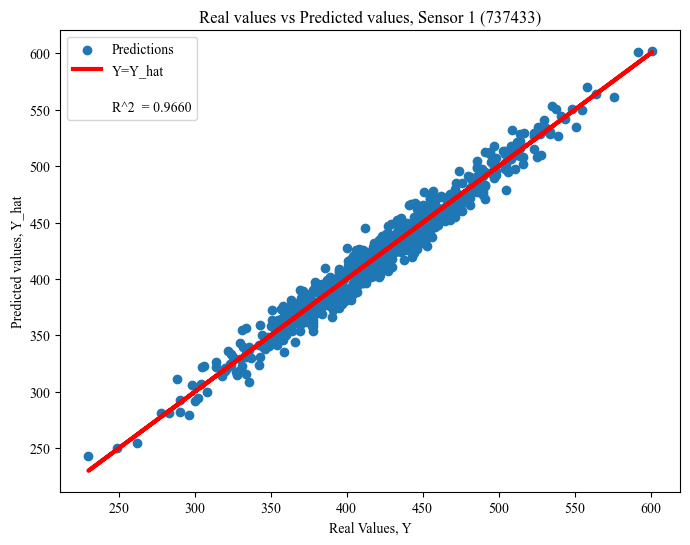

In [35]:
# Plot the accuracy
plt.figure(figsize=(8, 6))

r2 = r2_score(target_values, y_hat_)
print('r2: ', r2)

plt.scatter(target_values, y_hat_, label='Predictions')
plt.plot(target_values, target_values, color='red', linewidth = 3, label=f'Y=Y_hat')
plt.scatter(target_values, target_values, marker='', label=f'\nR^2  = {r2:.4f}')

plt.xlabel('Real Values, Y')
plt.ylabel('Predicted values, Y_hat')
plt.title('Real values vs Predicted values, Sensor 1 (737433)')
plt.legend()

plt.savefig('./figures/traffic_sensor_1.png')

plt.show() 


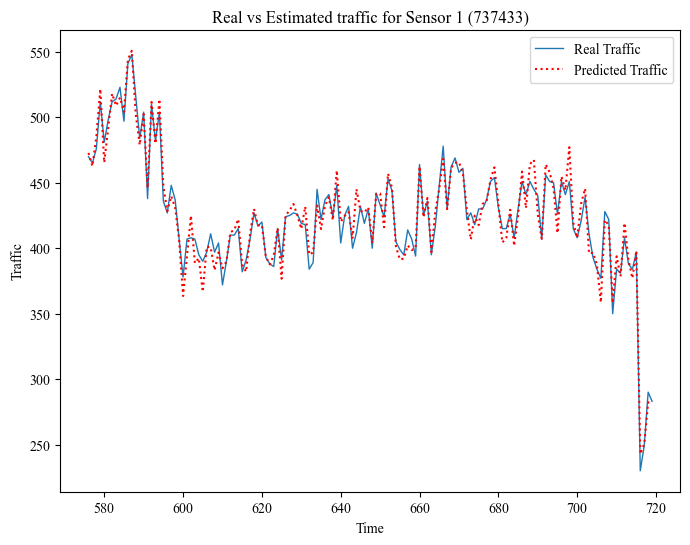

In [50]:
# Plot the traffic

number_days = 1
n = int(t/days * number_days)

plt.figure(figsize=(8, 6))

plt.plot(Y['Real_Values'][-n:], linewidth=1, label='Real Traffic')
plt.plot(Y['Predicted_Values'][-n:],color='red', linestyle='dotted', label='Predicted Traffic')
# plt.scatter(Y[-n:].index, Y['Predicted_Values'][-n:], marker='x', color = 'black',label='Predicted Traffic')

plt.xlabel('Time')
plt.ylabel('Traffic')
plt.title('Real vs Estimated traffic for Sensor 1 (737433)')
plt.legend()

plt.savefig('./Figures/traffic_sensor_1.png')

plt.show()


## 2. Sensor 764848 (traffic decrease after fire)

### Load the data of the sensor of interest, and the m closest sensors.

In [328]:
## m=4

sensor_2_ = pd.read_csv('./Data/sensor_interest_2 764848.txt')
print('sensor_2: ', sensor_2_.shape)


sensor_2_m_1_ = pd.read_csv('./Data/sensor_2_m_2 771475.txt')
sensor_2_m_2_ = pd.read_csv('./Data/sensor_2_m_4 771410.txt')
sensor_2_m_3_ = pd.read_csv('./Data/sensor_2_m_7 771421.txt')
sensor_2_m_4_ = pd.read_csv('./Data/sensor_2_m_9 771463.txt')


sensor_2:  (9216, 38)


### Filter out the measurements that are outside the time intervals of interest.
We want to see the measurements from   **_7 am to 7 pm_**

In [329]:
# Ensure 'Time' column is in datetime format
sensor_2_['Time'] = pd.to_datetime(sensor_2_['Time'])
sensor_2_m_1_['Time'] = pd.to_datetime(sensor_2_m_1_['Time'])
sensor_2_m_2_['Time'] = pd.to_datetime(sensor_2_m_2_['Time'])
sensor_2_m_3_['Time'] = pd.to_datetime(sensor_2_m_3_['Time'])
sensor_2_m_4_['Time'] = pd.to_datetime(sensor_2_m_4_['Time'])

# Filter out data outside of 7 AM to 7 PM
sensor_2 = sensor_2_[(sensor_2_['Time'].dt.hour >= 7) & (sensor_2_['Time'].dt.hour < 19)]
sensor_2_m_1 = sensor_2_m_1_[(sensor_2_m_1_['Time'].dt.hour >= 7) & (sensor_2_m_1_['Time'].dt.hour < 19)]
sensor_2_m_2 = sensor_2_m_2_[(sensor_2_m_2_['Time'].dt.hour >= 7) & (sensor_2_m_2_['Time'].dt.hour < 19)]
sensor_2_m_3 = sensor_2_m_3_[(sensor_2_m_3_['Time'].dt.hour >= 7) & (sensor_2_m_3_['Time'].dt.hour < 19)]
sensor_2_m_4 = sensor_2_m_4_[(sensor_2_m_4_['Time'].dt.hour >= 7) & (sensor_2_m_4_['Time'].dt.hour < 19)]

# Reset the indices
sensor_2 = sensor_2.reset_index(drop=True)
sensor_2_m_1 = sensor_2_m_1.reset_index(drop=True)
sensor_2_m_2 = sensor_2_m_2.reset_index(drop=True)
sensor_2_m_3 = sensor_2_m_3.reset_index(drop=True)
sensor_2_m_4 = sensor_2_m_4.reset_index(drop=True)

print('sensor_2: ', sensor_2.shape)
print('sensor_2_m_1: ', sensor_2_m_1.shape)
print('sensor_2_m_2: ', sensor_2_m_2.shape)
print('sensor_2_m_3: ', sensor_2_m_3.shape)
print('sensor_2_m_4: ', sensor_2_m_4.shape)

sensor_2:  (4608, 38)
sensor_2_m_1:  (4608, 34)
sensor_2_m_2:  (4608, 34)
sensor_2_m_3:  (4608, 34)
sensor_2_m_4:  (4607, 34)


### Generate the matrix as per the specifications in the paper.
Each row will have the measurements of traffic from the sensor of interest and the m-closest sensors.
- The rows will include traffic information of the t-1, t-2,..., t-r observations.
- The rows are organized by sensor, and by timestep: 
<br><br>[sensor of interest @ t-1,...,sensor of interest @ t-r, ... , m-closest sensor @ t-1,...,m-closest sensor @ t-r]

In [330]:
r = 3  # set r to any value

# Minimum number of rows across all dataframes
min_rows = min(sensor_2.shape[0], sensor_2_m_1.shape[0], sensor_2_m_2.shape[0], sensor_2_m_3.shape[0], sensor_2_m_4.shape[0])

# Initialize an empty list to store all row vectors
row_vectors = []

# Iterate over each index from r to min_rows
for i in tqdm(range(r, min_rows)):
    # Generate a list of indexes you're interested in. In this case, it's [i-r, i-r+1, ..., i]
    
    # ind = list(range(i-r, i+1))
    # indexes = list(range(i-r+1, i+1))
    
    ind = list(range(i+1, i-r, -1))
    indexes = list(range(i, i-r, -1))

    
    # Get the desired elements
    sensor_2_traffic = sensor_2.loc[ind, '10'].values
    sensor_2_m_1_traffic = sensor_2_m_1.loc[indexes, '10'].values
    sensor_2_m_2_traffic = sensor_2_m_2.loc[indexes, '10'].values
    sensor_2_m_3_traffic = sensor_2_m_3.loc[indexes, '10'].values
    sensor_2_m_4_traffic = sensor_2_m_4.loc[indexes, '10'].values
    
    # Concatenate them into a 1xr*5 row vector
    row_vector = np.concatenate([sensor_2_traffic, sensor_2_m_1_traffic, sensor_2_m_2_traffic, sensor_2_m_3_traffic, sensor_2_m_4_traffic])
    
    # Append the row vector to our list
    row_vectors.append(row_vector)

# Convert our list of row vectors into a 2D numpy array
traffic_764848 = pd.DataFrame(row_vectors)
traffic_764848

100%|██████████| 4604/4604 [00:07<00:00, 625.17it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,529.0,500.0,415.0,399.0,322.0,295.0,308.0,159.0,158.0,179.0,203.0,149.0,182.0,292.0,276.0,268.0
1,542.0,529.0,500.0,415.0,344.0,322.0,295.0,202.0,159.0,158.0,185.0,203.0,149.0,296.0,292.0,276.0
2,526.0,542.0,529.0,500.0,326.0,344.0,322.0,188.0,202.0,159.0,196.0,185.0,203.0,288.0,296.0,292.0
3,507.0,526.0,542.0,529.0,333.0,326.0,344.0,183.0,188.0,202.0,185.0,196.0,185.0,286.0,288.0,296.0
4,514.0,507.0,526.0,542.0,410.0,333.0,326.0,218.0,183.0,188.0,235.0,185.0,196.0,357.0,286.0,288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,395.0,432.0,462.0,467.0,147.0,181.0,183.0,245.0,231.0,241.0,271.0,274.0,265.0,170.0,144.0,170.0
4600,434.0,395.0,432.0,462.0,185.0,147.0,181.0,255.0,245.0,231.0,263.0,271.0,274.0,147.0,170.0,144.0
4601,392.0,434.0,395.0,432.0,158.0,185.0,147.0,246.0,255.0,245.0,260.0,263.0,271.0,160.0,147.0,170.0
4602,397.0,392.0,434.0,395.0,179.0,158.0,185.0,196.0,246.0,255.0,241.0,260.0,263.0,145.0,160.0,147.0


### Tests - Sensor 764848

#### Estimation

In [331]:

################################################################################################
####    Definition of "Hyperparameters"
################################################################################################
days = 5
t = int( (60/5)*12 * days)

#t = traffic_737433.shape[0] # Number of points to be tested on, and times the coefficients will be updated.
        # The coefficients w are calculatd for each of these points, the idea is to simulate an on-line stream of data. 

X = traffic_764848.iloc[:t, 1:]

"""
    Update this if using more input variables, # the function is handling a 15-dimensional, second order polynomial.
"""

polynomial_degree = 2
"""
    USING Total (vs. Max) EXPANCTION TERMS
    Number of terms in the weights matrix: 

"""


target_values = traffic_764848.iloc[:t, 0]     
# Generate Y as target_values (real Y's)

# Initialize weights and estimations 
weights_over_time = []
y_hat = []


noise = np.random.normal(scale= 10 , size=(t))

################################################################################################
####    Online estimation of coefficients
################################################################################################


for i in tqdm(range(t)):
    x_i = X.iloc[i, :]

    # Normalize and scale to -1,1 the input:
    x_i = ( x_i - x_i.min() ) / ( x_i.max() - x_i.min() )*2 - 1
    
    weight_predictions, _ = online_kaczmarz_legendre_multiple(x_i, [target_values[i] + noise[i]], polynomial_degree)
    
    #De-normalize rescale the weights:
    weight_predictions = (((weight_predictions + 1) / 2)  * ( x_i.max() - x_i.min() ) + x_i.min() )

    # Use predicted weights to compute y_hat
    y_predictions = generate_multi_legendre_design_matrix(x_i, polynomial_degree) @ weight_predictions.T 

    # Store the values of predicted y and estimated weights
    y_hat.append(y_predictions)
    weights_over_time.append(weight_predictions)

print("Done carajo")

100%|██████████| 720/720 [30:32<00:00,  2.54s/it]

Done carajo


In [332]:
weights_over_time = np.array(weights_over_time)
y_hat_ = np.array(y_hat) #########
print('y_hat: ', y_hat_.shape)

print('weights_over_time: ', weights_over_time.shape)

weight = weights_over_time[-1]
Weights = pd.DataFrame({
    'Estimated_Weights': weight
})

# Style DataFrame
# Weights.style.format("{:.4f}")

print('Weights: ', Weights.shape)

y_hat:  (720, 1)
weights_over_time:  (720, 136)
Weights:  (136, 1)


#### Results

In [333]:
################################################################################################
####    Results
################################################################################################

Predicted_Values = y_hat_.flatten()
print('Predicted_Values: ', Predicted_Values.shape)
Real_Values = traffic_764848.iloc[:t, 0]
print('Real_Values: ', Real_Values.shape)
difference = (Real_Values-Predicted_Values).T


Y = pd.DataFrame({
    'Predicted_Values': Predicted_Values,
    'Real_Values': Real_Values,
    'Difference': difference
})

# Style DataFrame
Y[-10:].style.format("{:.4f}")

Predicted_Values:  (720,)
Real_Values:  (720,)


,Predicted_Values,Real_Values,Difference
710,410.0546,415.0000,4.9454
711,433.8144,432.0000,-1.8144
712,464.1742,455.0000,-9.1742
713,448.3290,453.0000,4.6710
714,366.4545,376.0000,9.5455
715,396.3741,410.0000,13.6259
716,215.5438,223.0000,7.4562
717,225.9428,219.0000,-6.9428
718,224.9517,242.0000,17.0483
719,263.7334,252.0000,-11.7334


#### Plots

r2:  0.9634552456533417


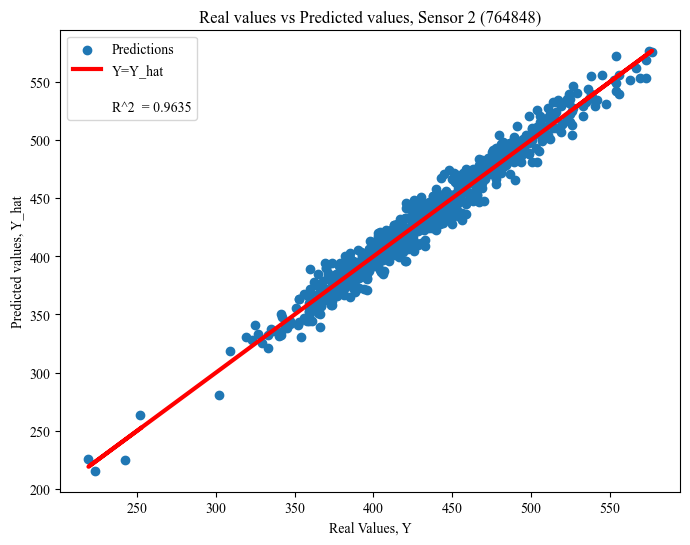

In [334]:
# Plot the accuracy
plt.figure(figsize=(8, 6))

r2 = r2_score(target_values, y_hat_)
print('r2: ', r2)

plt.scatter(target_values, y_hat_, label='Predictions')
plt.plot(target_values, target_values, color='red', linewidth = 3, label=f'Y=Y_hat')
plt.scatter(target_values, target_values, marker='', label=f'\nR^2  = {r2:.4f}')

plt.xlabel('Real Values, Y')
plt.ylabel('Predicted values, Y_hat')
plt.title('Real values vs Predicted values, Sensor 2 (764848)')
plt.legend()

plt.savefig('./figures/traffic_sensor_2.png')

plt.show() 


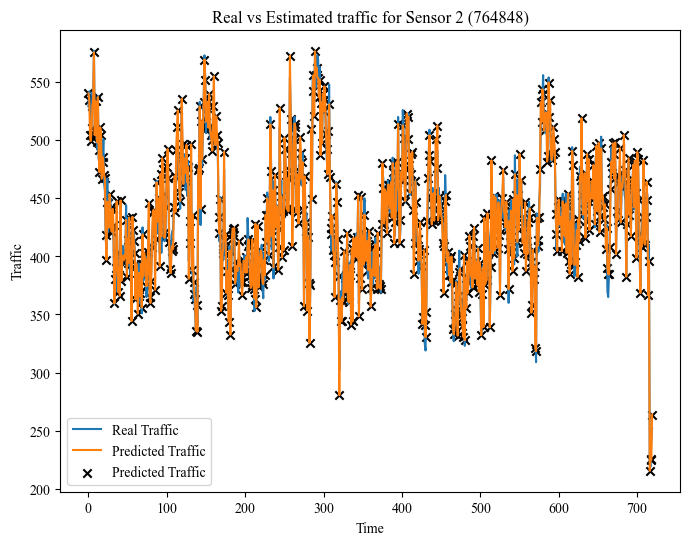

In [335]:
# Plot the traffic
n = t

plt.figure(figsize=(8, 6))

plt.plot(Y['Real_Values'][-n:],label='Real Traffic')
plt.plot(Y['Predicted_Values'][-n:],label='Predicted Traffic')
plt.scatter(Y[-n:].index, Y['Predicted_Values'][-n:], marker='x', color = 'black',label='Predicted Traffic')

plt.xlabel('Time')
plt.ylabel('Traffic')
plt.title('Real vs Estimated traffic for Sensor 2 (764848)')
plt.legend()

plt.savefig('./Figures/traffic_sensor_2.png')

plt.show()



## 3. Sensor 764632 (traffic changes after fire)

### Load the data of the sensor of interest, and the m closest sensors.

In [336]:
## m=4

sensor_3_ = pd.read_csv('./Data/sensor_interest_3 764632.txt')
print('sensor_3: ', sensor_3_.shape)

sensor_3_m_1_ = pd.read_csv('./Data/sensor_3_m_3 764958.txt')
sensor_3_m_2_ = pd.read_csv('./Data/sensor_3_m_6 764181.txt')
sensor_3_m_3_ = pd.read_csv('./Data/sensor_3_m_8 765100.txt')
sensor_3_m_4_ = pd.read_csv('./Data/sensor_3_m_11 760892.txt')

sensor_3:  (9216, 38)


### Filter out the measurements that are outside the time intervals of interest.
We want to see the measurements from   **_7 am to 7 pm_**

In [337]:
# Ensure 'Time' column is in datetime format
sensor_3_['Time'] = pd.to_datetime(sensor_3_['Time'])
sensor_3_m_1_['Time'] = pd.to_datetime(sensor_3_m_1_['Time'])
sensor_3_m_2_['Time'] = pd.to_datetime(sensor_3_m_2_['Time'])
sensor_3_m_3_['Time'] = pd.to_datetime(sensor_3_m_3_['Time'])
sensor_3_m_4_['Time'] = pd.to_datetime(sensor_3_m_4_['Time'])

# Filter out data outside of 7 AM to 7 PM
sensor_3 = sensor_3_[(sensor_3_['Time'].dt.hour >= 7) & (sensor_3_['Time'].dt.hour < 19)]
sensor_3_m_1 = sensor_3_m_1_[(sensor_3_m_1_['Time'].dt.hour >= 7) & (sensor_3_m_1_['Time'].dt.hour < 19)]
sensor_3_m_2 = sensor_3_m_2_[(sensor_3_m_2_['Time'].dt.hour >= 7) & (sensor_3_m_2_['Time'].dt.hour < 19)]
sensor_3_m_3 = sensor_3_m_3_[(sensor_3_m_3_['Time'].dt.hour >= 7) & (sensor_3_m_3_['Time'].dt.hour < 19)]
sensor_3_m_4 = sensor_3_m_4_[(sensor_3_m_4_['Time'].dt.hour >= 7) & (sensor_3_m_4_['Time'].dt.hour < 19)]

# Reset the indices
sensor_3 = sensor_3.reset_index(drop=True)
sensor_3_m_1 = sensor_3_m_1.reset_index(drop=True)
sensor_3_m_2 = sensor_3_m_2.reset_index(drop=True)
sensor_3_m_3 = sensor_3_m_3.reset_index(drop=True)
sensor_3_m_4 = sensor_3_m_4.reset_index(drop=True)

print('sensor_3: ', sensor_3.shape)
print('sensor_3_m_1: ', sensor_3_m_1.shape)
print('sensor_3_m_2: ', sensor_3_m_2.shape)
print('sensor_3_m_3: ', sensor_3_m_3.shape)
print('sensor_3_m_4: ', sensor_3_m_4.shape)

sensor_3:  (4608, 38)
sensor_3_m_1:  (4608, 38)
sensor_3_m_2:  (4608, 38)
sensor_3_m_3:  (4608, 38)
sensor_3_m_4:  (4608, 38)


### Generate the matrix as per the specifications in the paper.
Each row will have the measurements of traffic from the sensor of interest and the m-closest sensors.
- The rows will include traffic information of the t-1, t-2,..., t-r observations.
- The rows are organized by sensor, and by timestep: 
<br><br>[sensor of interest @ t-1,...,sensor of interest @ t-r, ... , m-closest sensor @ t-1,...,m-closest sensor @ t-r]

In [338]:
r = 3  # set r to any value

# Minimum number of rows across all dataframes
min_rows = min(sensor_3.shape[0], sensor_3_m_1.shape[0], sensor_3_m_2.shape[0], sensor_3_m_3.shape[0], sensor_3_m_4.shape[0])

# Initialize an empty list to store all row vectors
row_vectors = []

# Iterate over each index from r to min_rows
for i in tqdm(range(r, min_rows-1)):
    # Generate a list of indexes you're interested in. In this case, it's [i-r, i-r+1, ..., i]
    
    # ind = list(range(i-r, i+1))
    # indexes = list(range(i-r+1, i+1))
    
    ind = list(range(i+1, i-r, -1))
    indexes = list(range(i, i-r, -1))

    
    # Get the desired elements
    sensor_3_traffic = sensor_3.loc[ind, '10'].values
    sensor_3_m_1_traffic = sensor_3_m_1.loc[indexes, '10'].values
    sensor_3_m_2_traffic = sensor_3_m_2.loc[indexes, '10'].values
    sensor_3_m_3_traffic = sensor_3_m_3.loc[indexes, '10'].values
    sensor_3_m_4_traffic = sensor_3_m_4.loc[indexes, '10'].values
    
    # Concatenate them into a 1xr*5 row vector
    row_vector = np.concatenate([sensor_3_traffic, sensor_3_m_1_traffic, sensor_3_m_2_traffic, sensor_3_m_3_traffic, sensor_3_m_4_traffic])
    
    # Append the row vector to our list
    row_vectors.append(row_vector)

# Convert our list of row vectors into a 2D numpy array
traffic_764632 = pd.DataFrame(row_vectors)
traffic_764632

100%|██████████| 4604/4604 [00:07<00:00, 622.11it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,224.0,258.0,228.0,205.0,487.0,435.0,447.0,478.0,436.0,379.0,567.0,557.0,568.0,452.0,434.0,418.0
1,248.0,224.0,258.0,228.0,540.0,487.0,435.0,462.0,478.0,436.0,604.0,567.0,557.0,465.0,452.0,434.0
2,299.0,248.0,224.0,258.0,539.0,540.0,487.0,450.0,462.0,478.0,593.0,604.0,567.0,515.0,465.0,452.0
3,279.0,299.0,248.0,224.0,518.0,539.0,540.0,457.0,450.0,462.0,588.0,593.0,604.0,396.0,515.0,465.0
4,307.0,279.0,299.0,248.0,489.0,518.0,539.0,409.0,457.0,450.0,580.0,588.0,593.0,463.0,396.0,515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,403.0,346.0,419.0,379.0,417.0,444.0,491.0,464.0,412.0,420.0,439.0,482.0,496.0,338.0,384.0,407.0
4600,406.0,403.0,346.0,419.0,459.0,417.0,444.0,394.0,464.0,412.0,440.0,439.0,482.0,390.0,338.0,384.0
4601,348.0,406.0,403.0,346.0,397.0,459.0,417.0,425.0,394.0,464.0,453.0,440.0,439.0,332.0,390.0,338.0
4602,375.0,348.0,406.0,403.0,445.0,397.0,459.0,404.0,425.0,394.0,435.0,453.0,440.0,382.0,332.0,390.0


### Tests - Sensor 764632

#### Estimation

In [339]:

################################################################################################
####    Definition of "Hyperparameters"
################################################################################################
days = 5
t = int( (60/5)*12 * days)

#t = traffic_737433.shape[0] # Number of points to be tested on, and times the coefficients will be updated.
        # The coefficients w are calculatd for each of these points, the idea is to simulate an on-line stream of data. 

X = traffic_764632.iloc[:t, 1:]

"""
    Update this if using more input variables, # the function is handling a 15-dimensional, second order polynomial.
"""

polynomial_degree = 2
"""
    USING Total (vs. Max) EXPANCTION TERMS
    Number of terms in the weights matrix: 

"""


target_values = traffic_764632.iloc[:t, 0]     
# Generate Y as target_values (real Y's)

# Initialize weights and estimations 
weights_over_time = []
y_hat = []


noise = np.random.normal(scale= 10 , size=(t))

################################################################################################
####    Online estimation of coefficients
################################################################################################


for i in tqdm(range(t)):
    x_i = X.iloc[i, :]

    # Normalize and scale to -1,1 the input:
    x_i = ( x_i - x_i.min() ) / ( x_i.max() - x_i.min() )*2 - 1
    
    weight_predictions, _ = online_kaczmarz_legendre_multiple(x_i, [target_values[i] + noise[i]], polynomial_degree)
    
    #De-normalize rescale the weights:
    weight_predictions = (((weight_predictions + 1) / 2)  * ( x_i.max() - x_i.min() ) + x_i.min() )

    # Use predicted weights to compute y_hat
    y_predictions = generate_multi_legendre_design_matrix(x_i, polynomial_degree) @ weight_predictions.T 

    # Store the values of predicted y and estimated weights
    y_hat.append(y_predictions)
    weights_over_time.append(weight_predictions)

print("Done carajo")

100%|██████████| 720/720 [31:14<00:00,  2.60s/it]

Done carajo


In [340]:
weights_over_time = np.array(weights_over_time)
y_hat_ = np.array(y_hat) #########
print('y_hat: ', y_hat_.shape)

print('weights_over_time: ', weights_over_time.shape)

weight = weights_over_time[-1]
Weights = pd.DataFrame({
    'Estimated_Weights': weight
})

# Style DataFrame
# Weights.style.format("{:.4f}")

print('Weights: ', Weights.shape)

y_hat:  (720, 1)
weights_over_time:  (720, 136)
Weights:  (136, 1)


#### Results

In [341]:
################################################################################################
####    Results
################################################################################################

Predicted_Values = y_hat_.flatten()
print('Predicted_Values: ', Predicted_Values.shape)
Real_Values = target_values
print('Real_Values: ', Real_Values.shape)
difference = (Real_Values-Predicted_Values).T


Y = pd.DataFrame({
    'Predicted_Values': Predicted_Values,
    'Real_Values': Real_Values,
    'Difference': difference
})

# Style DataFrame
Y[-10:].style.format("{:.4f}")

Predicted_Values:  (720,)
Real_Values:  (720,)


,Predicted_Values,Real_Values,Difference
710,365.4008,382.0000,16.5992
711,352.1083,366.0000,13.8917
712,398.5010,388.0000,-10.5010
713,387.8755,390.0000,2.1245
714,417.8619,412.0000,-5.8619
715,386.4257,377.0000,-9.4257
716,483.4932,483.0000,-0.4932
717,456.7666,450.0000,-6.7666
718,460.9839,479.0000,18.0161
719,496.8770,508.0000,11.1230


#### Plots

r2:  0.9649484225792238


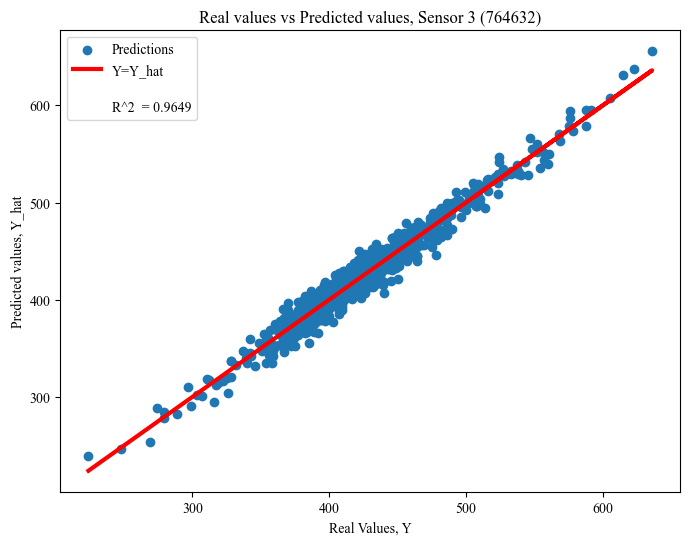

In [342]:
# Plot the accuracy
plt.figure(figsize=(8, 6))

r2 = r2_score(target_values, y_hat_)
print('r2: ', r2)

plt.scatter(target_values, y_hat_, label='Predictions')
plt.plot(target_values, target_values, color='red', linewidth = 3, label=f'Y=Y_hat')
plt.scatter(target_values, target_values, marker='', label=f'\nR^2  = {r2:.4f}')

plt.xlabel('Real Values, Y')
plt.ylabel('Predicted values, Y_hat')
plt.title('Real values vs Predicted values, Sensor 3 (764632)')
plt.legend()

plt.show() 


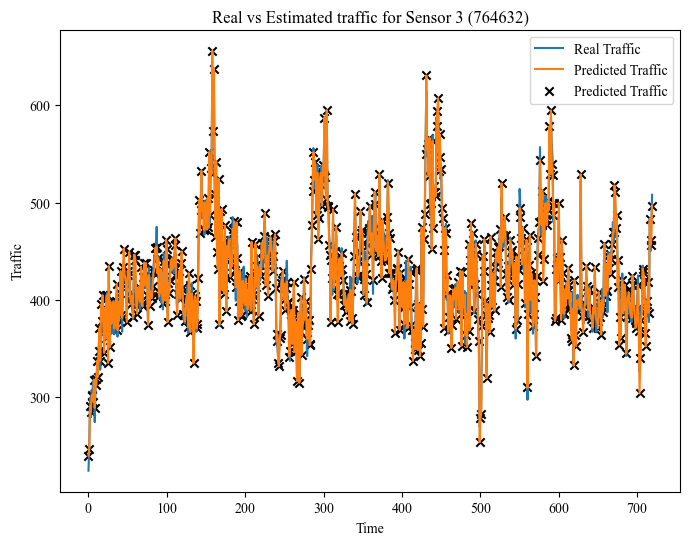

In [343]:
# Plot the traffic
n = t

plt.figure(figsize=(8, 6))

plt.plot(Y['Real_Values'][-n:],label='Real Traffic')
plt.plot(Y['Predicted_Values'][-n:],label='Predicted Traffic')
plt.scatter(Y[-n:].index, Y['Predicted_Values'][-n:], marker='x', color = 'black',label='Predicted Traffic')

plt.xlabel('Time')
plt.ylabel('Traffic')
plt.title('Real vs Estimated traffic for Sensor 3 (764632)')
plt.legend()

plt.savefig('./Figures/traffic_sensor_3.png')

plt.show()

In [346]:
s1 = pd.read_csv('./Data/sensor_interest_1 737433.txt')
s2 = pd.read_csv('./Data/sensor_interest_2 764848.txt')